Análisis exploratorio de la

In [1]:
#librerias
import imp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mysql.connector 


%matplotlib inline

In [2]:
#conexion
host='localhost'
user='root'
pw='fernanda23'
db='inegi'
connection=mysql.connector.connect(
    host=host,
    user=user,
    password=pw, 
    database=db
    )

In [3]:
table='SELECT * FROM conjunto_de_datos_tmujer_enadis_2017'
data=pd.read_sql(table, connection)
data

d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,upm,viv_sel,hogar,n_ren,pm7_1,pm7_2,pm7_3_1,pm7_3_2,pm7_3_3,pm7_3_4,...,pm7_5,pm7_6,factor_per,upm_dis,est_dis,tloc,estrato,ent,sexo,edad
0,100040,2,1,1,2,4,2,1,2,2,...,3,0,186,1,2,1,3,1,2,66
1,100040,2,1,2,2,6,2,2,2,2,...,2,0,186,1,2,1,3,1,2,55
2,100040,3,1,2,3,5,2,2,2,2,...,2,0,209,1,2,1,3,1,2,28
3,100040,4,1,3,4,1,1,1,2,2,...,2,1,186,1,2,1,3,1,2,42
4,100040,4,1,4,9,0,0,0,0,0,...,0,0,186,1,2,1,3,1,2,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9360,905085,2,1,4,1,1,2,2,2,2,...,2,0,8285,1422,102,1,2,9,2,21
9361,905085,4,1,3,1,4,1,1,1,1,...,3,8,1591,1422,102,1,2,9,2,68
9362,905239,1,1,2,1,2,1,2,1,2,...,2,0,941,1423,102,1,2,9,2,33
9363,905239,2,1,1,3,5,1,2,2,2,...,1,0,941,1423,102,1,2,9,2,37


In [4]:
diccionario_pm_7='SELECT * FROM pm7_1'
pd.read_sql(diccionario_pm_7,connection)

d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cve,descrip
0,1,Mucho
1,2,Algo
2,3,Poco
3,4,Nada
4,9,No sabe


d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


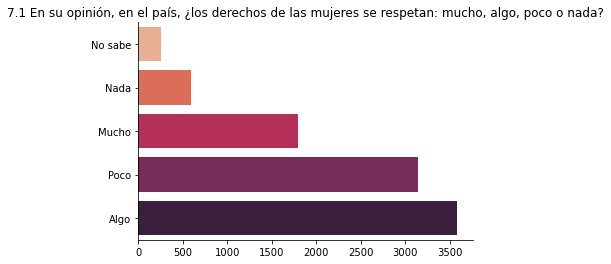

In [5]:
value_counts_pm7="""SELECT c.descrip, COUNT(d.pm7_1) as cuenta FROM pm7_1 as c RIGHT
JOIN conjunto_de_datos_tmujer_enadis_2017 as d
ON c.cve=d.pm7_1 GROUP BY d.pm7_1"""

value_counts_pm7=pd.read_sql(value_counts_pm7,connection)
value_counts_pm7
value_counts_pm7=value_counts_pm7.sort_values('cuenta', ascending=True)

sns.barplot(x=value_counts_pm7['cuenta'],
            y=value_counts_pm7['descrip'],
            data=value_counts_pm7,
            palette='rocket_r'
            )
            
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0) #ha='right' )
sns.despine()
plt.title('7.1 En su opinión, en el país, ¿los derechos de las mujeres se respetan: mucho, algo, poco o nada?')
plt.savefig('/DIEGO/Documents/CODIGO/Discriminación en mujeres/Gráficas/pregunta7_1.png')


d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


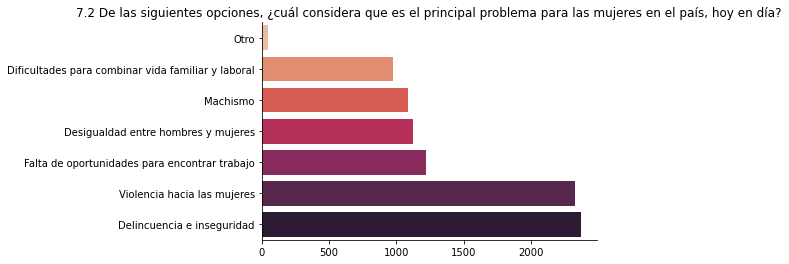

In [6]:
value_counts_pm7_2="""SELECT c.descrip, COUNT(d.pm7_2) as cuenta FROM pm7_2 as c RIGHT
JOIN conjunto_de_datos_tmujer_enadis_2017 as d
ON c.cve=d.pm7_2 GROUP BY d.pm7_2"""

value_counts_pm7_2=pd.read_sql(value_counts_pm7_2,connection)
value_counts_pm7_2=value_counts_pm7_2.sort_values('cuenta', ascending=True)

sns.barplot(x=value_counts_pm7_2['cuenta'],
            y=value_counts_pm7_2['descrip'],
            data=value_counts_pm7_2,
            palette='rocket_r',
            )
            
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0) #ha='right' )
sns.despine()
plt.title('7.2 De las siguientes opciones, ¿cuál considera que es el principal problema para las mujeres en el país, hoy en día?')
plt.savefig('/DIEGO/Documents/CODIGO/Discriminación en mujeres/Gráficas/pregunta7_2.png')

In [7]:
value_counts_pm7_3=[]
for i in range(1,6):
    query="""SELECT c.descrip, COUNT(d.pm7_3_{}) as cuenta FROM pm7_3 as c RIGHT
    JOIN conjunto_de_datos_tmujer_enadis_2017 as d
    ON c.cve=d.pm7_3_{} GROUP BY d.pm7_3_{}""".format(i,i,i)
    value_counts_pm7_3.append(query)    

In [27]:
value_counts_pm7_3

['SELECT c.descrip, COUNT(d.pm7_3_1) as cuenta FROM pm7_3 as c RIGHT\n    JOIN conjunto_de_datos_tmujer_enadis_2017 as d\n    ON c.cve=d.pm7_3_1 GROUP BY d.pm3_1',
 'SELECT c.descrip, COUNT(d.pm7_3_2) as cuenta FROM pm7_3 as c RIGHT\n    JOIN conjunto_de_datos_tmujer_enadis_2017 as d\n    ON c.cve=d.pm7_3_2 GROUP BY d.pm3_2',
 'SELECT c.descrip, COUNT(d.pm7_3_3) as cuenta FROM pm7_3 as c RIGHT\n    JOIN conjunto_de_datos_tmujer_enadis_2017 as d\n    ON c.cve=d.pm7_3_3 GROUP BY d.pm3_3',
 'SELECT c.descrip, COUNT(d.pm7_3_4) as cuenta FROM pm7_3 as c RIGHT\n    JOIN conjunto_de_datos_tmujer_enadis_2017 as d\n    ON c.cve=d.pm7_3_4 GROUP BY d.pm3_4',
 'SELECT c.descrip, COUNT(d.pm7_3_5) as cuenta FROM pm7_3 as c RIGHT\n    JOIN conjunto_de_datos_tmujer_enadis_2017 as d\n    ON c.cve=d.pm7_3_5 GROUP BY d.pm3_5']

d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionoth

<Figure size 7200x50400 with 0 Axes>

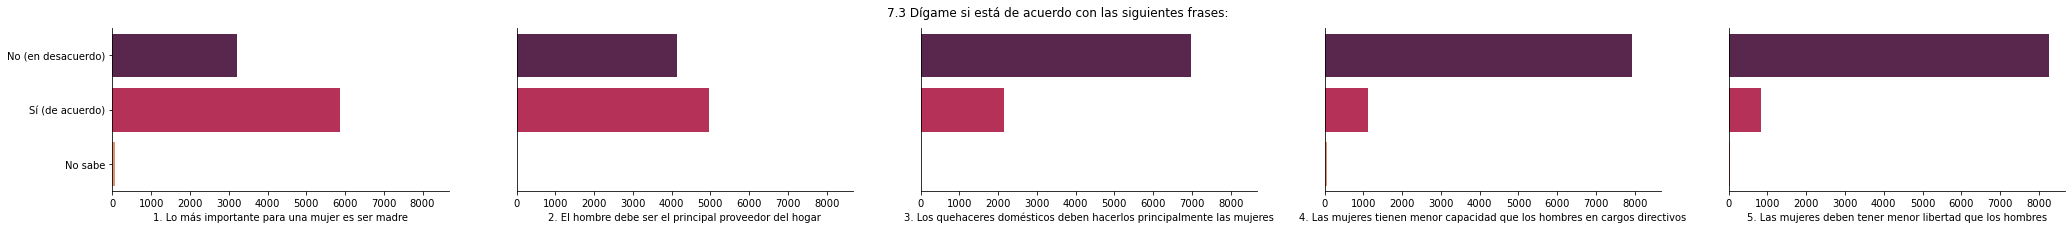

In [14]:

plt.figure(figsize=(100,700))
fig, axes= plt.subplots(1,5,sharex=True, figsize=(35,3))
i=0
preguntas=['1. Lo más importante para una mujer es ser madre',
           '2. El hombre debe ser el principal proveedor del hogar',
           '3. Los quehaceres domésticos deben hacerlos principalmente las mujeres',
           '4. Las mujeres tienen menor capacidad que los hombres en cargos directivos',
           '5. Las mujeres deben tener menor libertad que los hombres']


for table in value_counts_pm7_3:

    value_counts_pm7_3_plot=pd.read_sql(table,connection)
   # value_counts_pm7_3_plot=value_counts_pm7_3_plot.sort_values('cuenta', ascending=True)


    sns.barplot(ax=axes[i],
                x=value_counts_pm7_3_plot['cuenta'],
                y=value_counts_pm7_3_plot['descrip'], 
                data=value_counts_pm7_3_plot,
                palette='rocket'
                )
                
    axes[i].set_xlabel(preguntas[i])
    axes[i].set_ylabel('')

    if i!=0:
        axes[i].set_yticks([])
    sns.despine()
    i+=1

plt.suptitle('7.3 Dígame si está de acuerdo con las siguientes frases:')
plt.savefig('/DIEGO/Documents/CODIGO/Discriminación en mujeres/Gráficas/pregunta7_3.png')